MatShape is
(512, 512)


ValueError: cannot reshape array of size 262144 into shape (3)

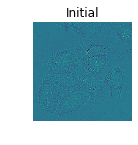

In [56]:
## import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2 as cv

from scipy import ndimage as ndi
from skimage.morphology import watershed
from skimage.feature import peak_local_max
from sklearn.cluster import MeanShift, estimate_bandwidth

from PIL import Image

%matplotlib inline
size = 512, 512

img_names = ["coins.png", "kiwi.png"]
ext_names = ["t000.tif", "t010.tif"]

images = [i for i in img_names]
ext_images = [i for i in ext_names]


"""
for img_path in ext_images:
    
    print("Loading an image:")
    
    #Preprocessing
  """  
    



def plot_three_images(figure_title, image1, label1,
                      image2, label2, image3, label3):
    fig = plt.figure()
    fig.suptitle(figure_title)

    # Display the first image
    fig.add_subplot(1, 3, 1)
    plt.imshow(image1)
    plt.axis('off')
    plt.title(label1)

    # Display the second image
    fig.add_subplot(1, 3, 2)
    plt.imshow(image2)
    plt.axis('off')
    plt.title(label2)

    # Display the third image
    fig.add_subplot(1, 3, 3)
    plt.imshow(image3)
    plt.axis('off')
    plt.title(label3)

    plt.show()


   

 #
# +-------------------+
# |     Task 3        |
# +-------------------+
#
# Loop for the extension component

for img_path in ext_images:

    print(f"Reading {img_path}")
    
    img = cv.imread(img_path)
   
    fig = plt.figure()
    fig.add_subplot(1, 3, 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title("Initial")
    
    
    img_mat = img[:, :] #Copy the pixels (no need for :3 since no colour channels??)

    print(img_mat.shape)
    exit(1)
    
    #512^2 / 3 ceiling integer is 87382
    
    img_matShape = img_mat.shape
    print("MatShape is")
    print(img_matShape)
    colour_samples=np.reshape(img_mat, [-1,3])
    print("Colorsamples shape is")
    print(colour_samples.shape)
    
    bandwidth = estimate_bandwidth(colour_samples, quantile=0.1, n_samples=100)  
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    
    ms.fit(colour_samples)
    ms_labels = ms.labels_
    
    cluster_centers = ms.cluster_centers_  
    labels_unique = np.unique(ms_labels)
      
    segmentedImg = np.reshape(ms_labels , img_matShape[:2])
    ms_labels = segmentedImg 

    
    fig.add_subplot(1, 3, 2)
    plt.imshow(ms_labels)
    plt.axis('off')
    plt.title("MS")

    # TODO: perform an optimisation and then watershed on image
    
    #TODO FIX THIS BELOW LINE
    #gray = cv2.cvtColor(img_mat, cv2.COLOR_BGR2GRAY)
    
    img_array = img_mat
    distance = ndi.distance_transform_edt(img_array)
    local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((51, 51)),labels=img_array)
    markers = ndi.label(local_maxi)[0]
    ws_labels = watershed(-distance, markers, mask=img_array)
    
    
    fig.add_subplot(1, 3, 3)
    plt.imshow(ws_labels)
    plt.axis('off')
    plt.title("WS")
    
    imgFinal=plot_three_images(img_path, img, "Original Image", ms_labels, "MeanShift Labels",
                      ws_labels, "Watershed Labels")

    # Display the results
   


print("End of program!")